## Randomly Generate A Stock Price & View The Data

In [1]:
from streamsx.topology.topology import Topology
from streamsx.topology import context
from some_module import jsonRandomWalk
#from streamsx import rest
import json

# Define topology & submit
rw = jsonRandomWalk()
top = Topology("myTop")
stream_1 = top.source(rw)
view = stream_1.view()
stream_1.print()

## Submit To Remote Streams Install

In [2]:
context.submit("DISTRIBUTED", top.graph, username = "streamsadmin", password = "passw0rd")

Sep 21, 2016 9:48:49 AM com.ibm.streamsx.topology.internal.streams.InvokeMakeToolkit invoke
INFO: Invoking spl-make-toolkit
Sep 21, 2016 9:48:49 AM com.ibm.streamsx.topology.internal.streams.InvokeMakeToolkit invoke
INFO: /opt/ibm/InfoSphere_Streams/4.1.1.0/bin/spl-make-toolkit --make-operator -i /home/streamsadmin/scratch/demos/ViewDemo/tk6810820737900267918
Sep 21, 2016 9:48:49 AM com.ibm.streamsx.topology.internal.streams.InvokeMakeToolkit invoke
INFO: spl-make-toolkit complete: return code=0
Sep 21, 2016 9:48:49 AM com.ibm.streamsx.topology.internal.streams.InvokeSc getToolkitPath
INFO: ToolkitPath:/home/streamsadmin/git/streamsx.topology/com.ibm.streamsx.topology:/opt/ibm/InfoSphere_Streams/4.1.1.0/toolkits
Sep 21, 2016 9:48:49 AM com.ibm.streamsx.topology.internal.streams.InvokeSc invoke
INFO: Invoking SPL compiler (sc) for main composite: myTop::myTop
Sep 21, 2016 9:48:49 AM com.ibm.streamsx.topology.internal.streams.InvokeSc invoke
INFO: /opt/ibm/InfoSphere_Streams/4.1.1.0/bin/

## Graph The Live Feed Using Matplotlib

<IPython.core.display.Javascript object>


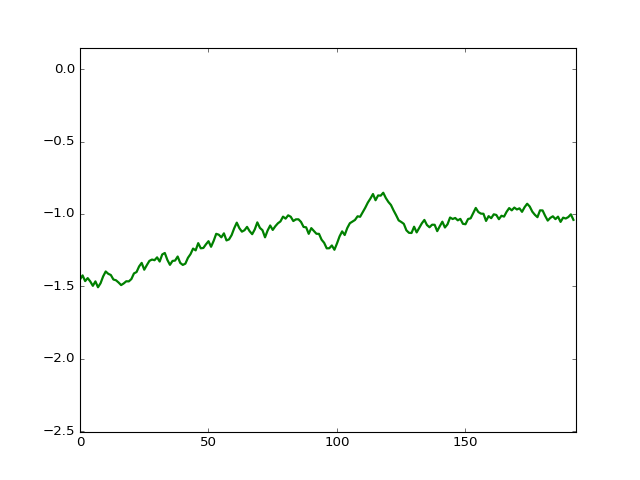

KeyboardInterrupt: 

In [5]:
%matplotlib inline
%matplotlib notebook

from streamsx import rest
rest.graph_every(view, 'val', 1.0)

## Begin Retreiving The Data In A Blocking Queue

In [3]:
from streamsx import rest
queue = view.start_data_fetch()

## Print Data to Screen

In [4]:
for i in iter(queue.get, None):
    print(i)

{'val': -0.2850615167083398}
{'val': -0.29261519901210015}
{'val': -0.29755218345604034}
{'val': -0.3108593664584445}
{'val': -0.31105113673992446}
{'val': -0.29792026666310506}
{'val': -0.3210744467106869}
{'val': -0.36625135193393105}
{'val': -0.3577710955206727}
{'val': -0.35723918970570934}
{'val': -0.4068591962591906}
{'val': -0.3897594173044487}
{'val': -0.37904453545799005}
{'val': -0.3306668718082691}
{'val': -0.3773335720169564}
{'val': -0.42595242632430363}
{'val': -0.40963890585247775}
{'val': -0.4243495530818217}
{'val': -0.4102086882019733}
{'val': -0.40462997430339737}
{'val': -0.4319731084957768}
{'val': -0.384206936475669}
{'val': -0.3921988339811224}
{'val': -0.41955739881377957}
{'val': -0.443054439283781}
{'val': -0.45157244504373395}
{'val': -0.45901348066845044}
{'val': -0.41233651414096023}
{'val': -0.4066572680562478}
{'val': -0.4395489642888517}
{'val': -0.4686538638585497}
{'val': -0.4866103987963493}
{'val': -0.4490652181122029}
{'val': -0.44394417215703974}
{

KeyboardInterrupt: 

## Stop Fetching The Data, Cancelling The Background Thread

In [ ]:
view.stop_data_fetch()